# COMP 3122 - Assignment 2
#### *Matthew Macalalad, 101510305*

## PART A - Decision Trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:

df = pd.read_csv("Covid_Dataset.csv")
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [3]:
# Since every value is mapped to either "Yes" or "No" and sklearn models need numerical values for features,
# we need to map all of them to either 1 (for yes) or 0 (for no)
df = df.replace({"Yes": 1, "No": 0})
df.head()

C:\Users\Matth\AppData\Local\Temp\ipykernel_55636\3430789572.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Yes": 1, "No": 0})


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [4]:
cols = df.columns[:-1].tolist()
X = df[cols]
# print(X)
y = df["COVID-19"]
# print(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy*100}%")

Accuracy Score: 97.73145309625997%


## PART B - Working with Pandas

In [6]:
df_b = pd.read_csv("assign2.csv")
df_b.head()

,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,F,NXEYEM,EX85,[56$],Asia
1,20,299,21,M,VNFKZD,CT41,[18$],Asia
2,30,378,28,X,IMGMFY,VN81,[90$],North America
3,40,156,44,Q,RHRHJY,IR14,[89$],Asia
4,50,468,33,J,HPQCMC,QX90,[95$],Africa


**Task 1**  
  
Permanently delete the ‘Model’ column. How can you confirm it’s deleted?

In [7]:
df_b.drop(columns=["Model"], inplace=True)
# Check if the column is still there using info()
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         950 non-null    int64 
 1   Range      950 non-null    int64 
 2   Value      950 non-null    int64 
 3   Type       948 non-null    object
 4   Zip Code   941 non-null    object
 5   Cost       950 non-null    object
 6   Continent  950 non-null    object
dtypes: int64(3), object(4)
memory usage: 52.1+ KB


**Task 2**  
  
Remove “[”, “$”, “]” symbols from the ‘Cost’ column permanently. What is the column’s data type after cleaning?

In [8]:
df_b["Cost"] = df_b["Cost"].str.replace("[][$]", "", regex=True)
print(df_b.info())
df_b.head()
# Cost column's type is object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         950 non-null    int64 
 1   Range      950 non-null    int64 
 2   Value      950 non-null    int64 
 3   Type       948 non-null    object
 4   Zip Code   941 non-null    object
 5   Cost       950 non-null    object
 6   Continent  950 non-null    object
dtypes: int64(3), object(4)
memory usage: 52.1+ KB
None


,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,F,NXEYEM,56,Asia
1,20,299,21,M,VNFKZD,18,Asia
2,30,378,28,X,IMGMFY,90,North America
3,40,156,44,Q,RHRHJY,89,Asia
4,50,468,33,J,HPQCMC,95,Africa


**Task 3**  
  
Convert the ‘Cost’ column to integer.

In [9]:
df_b["Cost"] = df_b["Cost"].astype(int)
print(df_b.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         950 non-null    int64 
 1   Range      950 non-null    int64 
 2   Value      950 non-null    int64 
 3   Type       948 non-null    object
 4   Zip Code   941 non-null    object
 5   Cost       950 non-null    int64 
 6   Continent  950 non-null    object
dtypes: int64(4), object(3)
memory usage: 52.1+ KB
None


**Task 4**  
  
Compute: (a) Average of the ‘Cost’ column. (b) Average ‘Cost’ per ‘Continent’.

In [10]:
# Average of "Cost" column
avg_cost = df_b["Cost"].mean()
print(f"Average Cost: ${avg_cost}")

Average Cost: $54.626315789473686


In [11]:
# Average cost per Continent
avg_cost_by_cont = df_b.groupby("Continent")["Cost"].mean()
print(avg_cost_by_cont)

Continent
Africa           54.741259
Antarctica       54.706897
Asia             54.267176
Australia        56.838028
Europe           53.258993
North America    55.284722
South America    53.162963
Name: Cost, dtype: float64


**Task 5**  
  
Plot a bar chart showing the mean of numerical columns grouped by ‘Continent’.

Text(0, 0.5, 'Average')

<Figure size 640x480 with 0 Axes>

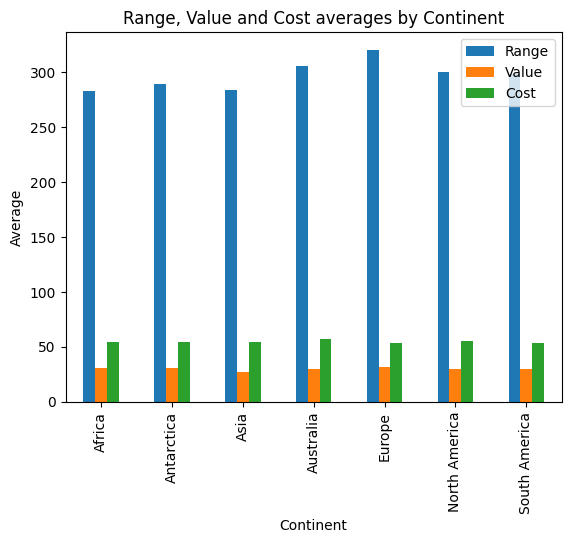

In [12]:
# ID is also an integer, but as a value it shouldn't be mapped (large average makes rest hard to parse)
cols = ["Range", "Value", "Cost"]

plt.figure()
df_b.groupby("Continent")[cols].mean().plot.bar()
plt.title("Range, Value and Cost averages by Continent")
plt.xlabel("Continent")
plt.ylabel("Average")

**Task 6**  
  
Count how many times each continent appears in the ‘Continent’ column.

In [13]:
df_b["Continent"].value_counts()

Continent
North America    144
Africa           143
Australia        142
Europe           139
South America    135
Asia             131
Antarctica       116
Name: count, dtype: int64

**Task 7**  
  
Display unique values in the ‘Continent’ column and count them.

In [14]:
print(df_b["Continent"].unique())
print(df_b["Continent"].nunique())
# 7 unique Continent values in the data set

['Asia' 'North America' 'Africa' 'Europe' 'Antarctica' 'South America'
 'Australia']
7


**Task 8**  
  
Use value_counts() on the ‘Cost’ column and describe the output in a comment.

In [15]:
df_b["Cost"].value_counts()
# The output displays each unique cost value, and counts how often each appears in the data set
# Costs of 56 and 35 are most frequent, with a count of 20 each
# Cost of 24 is least frequent, with a count of 2

Cost
56    20
35    20
73    18
54    17
81    17
      ..
77     5
22     5
30     5
42     3
24     2
Name: count, Length: 90, dtype: int64

**Task 9**  
  
Plot a histogram of the ‘Cost’ column (bonus: use 50 bins).

Text(0, 0.5, 'Count')

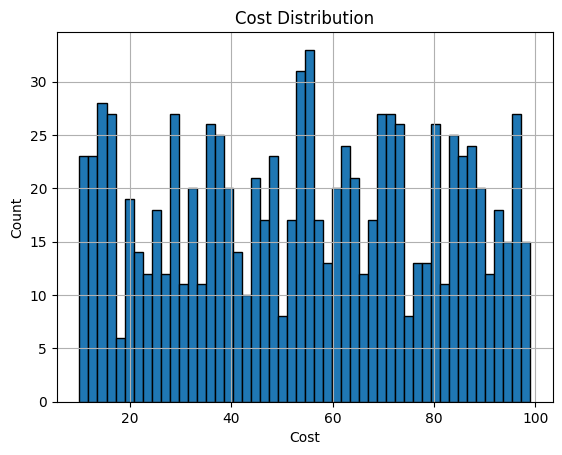

In [16]:
plt.figure()
df_b["Cost"].hist(bins=50, edgecolor="black")
plt.title("Cost Distribution")
plt.xlabel("Cost")
plt.ylabel("Count")

**Task 10**  
  
Find missing values in ‘Zip Code’ and ‘Type’ columns; summarize all null values in the DataFrame.

In [17]:
print("Number of missing Zip Code values:", df_b["Zip Code"].isna().sum())
print("Number of missing Type values:", df_b["Type"].isna().sum())

print(f"Total number of missing values in dataset:\n{df_b.isna().sum()}")

Number of missing Zip Code values: 9
Number of missing Type values: 2
Total number of missing values in dataset:
ID           0
Range        0
Value        0
Type         2
Zip Code     9
Cost         0
Continent    0
dtype: int64


**Task 11**  
  
Show the statistics for ‘Type’ including NaN values. Replace missing ‘Type’ values with ‘XXX’.

In [18]:
print(df_b["Type"].describe())
df_b["Type"].value_counts(dropna=False)

count     948
unique     26
top         F
freq       50
Name: Type, dtype: object


Type
F      50
N      47
Q      45
Z      44
C      43
K      41
V      41
A      40
Y      39
H      39
M      38
G      38
X      38
U      36
O      36
J      35
L      35
S      34
I      33
W      32
D      30
B      29
T      28
P      28
R      25
E      24
NaN     2
Name: count, dtype: int64

In [19]:
df_b["Type"].fillna("XXX", inplace=True)
print(df_b["Type"].describe())
# Now count shows as 950 (2 na values replaced)

count     950
unique     27
top         F
freq       50
Name: Type, dtype: object


C:\Users\Matth\AppData\Local\Temp\ipykernel_55636\3392249494.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_b["Type"].fillna("XXX", inplace=True)


**Task 12**  
  
Drop all rows with any missing values — how many rows remain?

In [20]:
print(df_b.shape)
df_b = df_b.dropna()
print(df_b.shape)
# 9 rows were dropped (corresponding with the 9 na values found in Zip Code that weren't filled)

(950, 7)
(941, 7)


**Task 13**  
  
Use describe() to see statistics, and fetch the value of the first row and third column of the result.

In [21]:
df_b_stats = df_b.describe()
df_b_stats

,ID,Range,Value,Cost
count,941.000000,941.000000,941.000000,941.000000
mean,4734.091392,297.435707,29.931987,54.652497
std,2747.571064,115.831469,12.287671,25.786838
min,10.000000,100.000000,10.000000,10.000000
25%,2360.000000,194.000000,19.000000,33.000000
50%,4710.000000,296.000000,30.000000,55.000000
75%,7090.000000,400.000000,41.000000,76.000000
max,9500.000000,500.000000,50.000000,99.000000


In [22]:
print(df_b_stats.iloc[0, 2])

941.0


**Task 14**  
  
Sort the value_counts() of ‘Continent’ by frequency, then alphabetically.

In [23]:
df_b_continent_freq = df_b["Continent"].value_counts()
print(df_b_continent_freq)

Continent
North America    142
Australia        141
Africa           139
Europe           138
South America    135
Asia             131
Antarctica       115
Name: count, dtype: int64


In [24]:
df_b_continent_alph = df_b["Continent"].value_counts().sort_index()
print(df_b_continent_alph)

Continent
Africa           139
Antarctica       115
Asia             131
Australia        141
Europe           138
North America    142
South America    135
Name: count, dtype: int64
